In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
auto=pd.read_csv("auto1.csv")

In [3]:
# auto.head(56)

In [4]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
Y = auto.iloc[:,0]
X= auto.iloc[:,3]

In [6]:
X

0      130
1      165
2      150
3      150
4      140
      ... 
387     86
388     52
389     84
390     79
391     82
Name: horsepower, Length: 392, dtype: int64

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

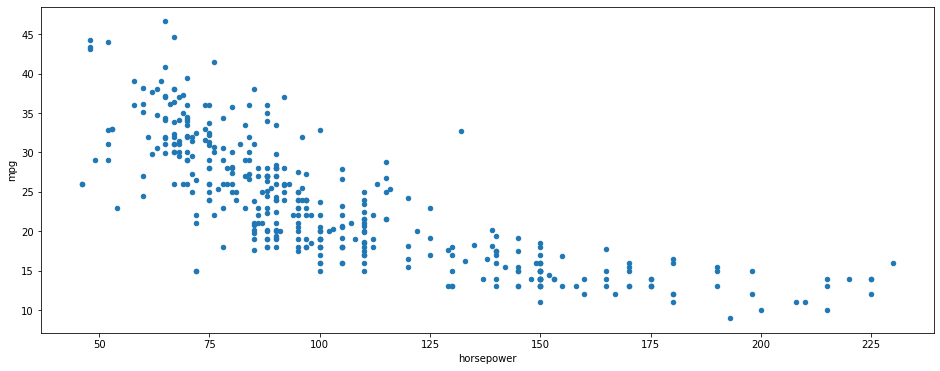

In [7]:
auto.plot(kind='scatter', x='horsepower', y='mpg' , figsize=(16,6))

## part(a)

In [8]:
import statsmodels.api as sm

model = sm.OLS(Y, sm.add_constant(X))
model_fit = model.fit()       

print(model_fit.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           7.03e-81
Time:                        21:54:54   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

## part A (iv) confidence interval

In [9]:
model_fit.conf_int()

,0,1
const,38.525212,41.346510
horsepower,-0.170517,-0.145172


In [10]:
x=X.to_numpy().reshape((-1,1))

In [11]:
y=Y.to_numpy()

In [12]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x,y)

LinearRegression()

In [13]:
print("R-squared value :" ,model.score(x,y))

R-squared value : 0.6059482578894348


In [14]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 39.93586102117047
slope: [-0.15784473]


In [15]:
y_pred = model.predict(x)

## part(b)

<function matplotlib.pyplot.show(close=None, block=None)>

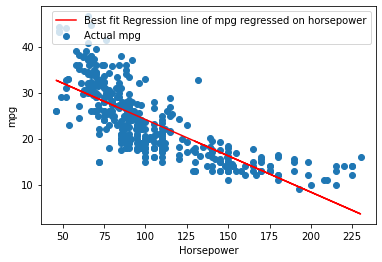

In [16]:
plt.plot(x, y_pred, color='red', label='Best fit Regression line of mpg regressed on horsepower')
plt.scatter(x,y, label='Actual mpg')
plt.xlabel('Horsepower')
plt.ylabel('mpg')
plt.legend()
plt.show

In [17]:
print('predicted value for horsepower of 95 :' ,39.93586102117047 + 95*-0.15784473)


predicted value for horsepower of 95 : 24.94061167117047


In [18]:
dataframe = pd.concat([X, Y], axis=1)

In [19]:
# model values
model_fitted_y = model_fit.fittedvalues
# model residuals
model_residuals = model_fit.resid

C:\Users\ABC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


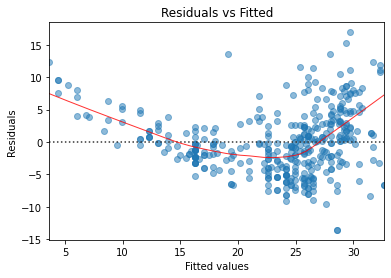

In [20]:

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

## part(c) in the residual plot there is a clear pattern hence it indicates the non-linearity in the data